In [1]:
using PyPlot
using HDF5
using AlfvenDetectors

In [2]:
datapath = "/home/vit/vyzkum/alfven/cdb_data/uprobe_data/"

"/home/vit/vyzkum/alfven/cdb_data/uprobe_data/"

In [3]:
files = readdir(datapath);
length(files)

1028

In [5]:
file

"/home/vit/vyzkum/alfven/cdb_data/uprobe_data/uprobe_10050.h5"

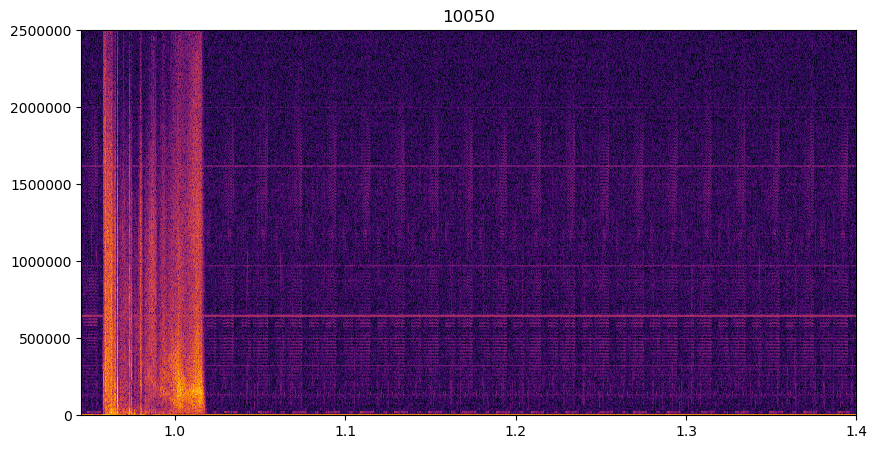

PyObject <matplotlib.collections.QuadMesh object at 0x7f2931bda908>

In [4]:
shotno = 10000 + 50
file = joinpath(datapath, filter(x->occursin("$shotno", x), files)[1])
readfun = 
data = AlfvenDetectors.get_signal(file, AlfvenDetectors.readnormlogupsd);
readt(x;warns=false) = AlfvenDetectors.readsignal(x, "t_Uprobe"; warns=warns)
t = AlfvenDetectors.get_signal(file, readt);
f = AlfvenDetectors.readsignal(file, "f_Uprobe");
size(data)
cmap = "inferno"
figure(figsize=(10,5))
title(shotno)
pcolormesh(t,f,data,cmap=cmap)

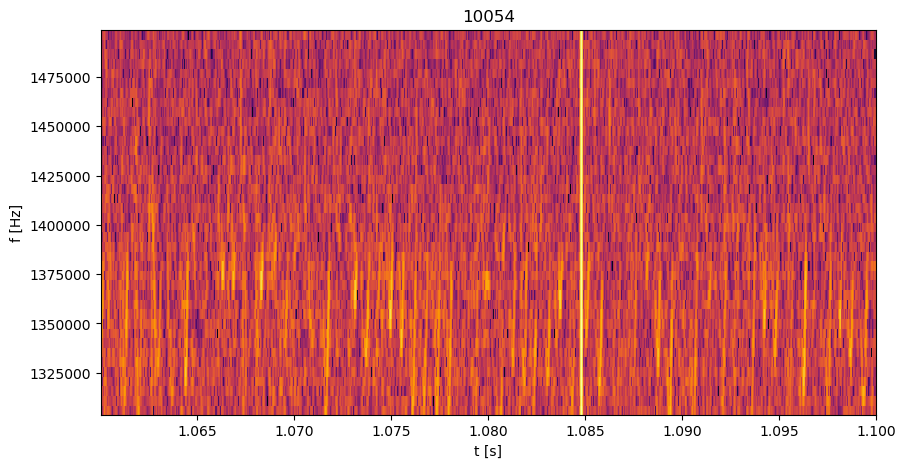

PyObject Text(24.0, 0.5, 'f [Hz]')

In [44]:
figure(figsize=(10,5))
title(shotno)
ylim = [1300000,1500000]
xlim = [1.06, 1.1]
yinds = ylim[1] .< f .< ylim[2]
xinds = xlim[1] .< t .< xlim[2]
pcolormesh(t[xinds],f[yinds],data[yinds,xinds],cmap=cmap)
xlabel("t [s]")
ylabel("f [Hz]")

In [ ]:
coil = 12
mirnovdata = AlfvenDetectors.readmscamp(file,coil)
mt = AlfvenDetectors.readsignal(file,"t_cohere")
ft = AlfvenDetectors.readsignal(file,"f_cohere")
pcolormesh(mt,ft,mirnovdata,cmap=cmap)